# Exploring-Household-Level-Economics-In-The-Philippines
## Using cluster analysis in Python to explore consumption patterns and purchasing decisions in Filipino household data

### Importing and Exploring the Data
First, I wanted to import and explore the dataset to better know what information I had to work with. The dataset has more than 40,000 observations, which is far too large for my laptop, as clustering algorithms have an O(nk) cost function. Usually, this should be less than 10,000 observations as a general rule of thumb, so I will take a random sample of 9,000 of the rows. Also, the set has 60 features. I'll want to narrow this down to a much smaller number. For this analysis I will focus only on consumption patterns across food subcategories, including variables for total food expenditure, income, and family size to check for correlation.

In [16]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Import dataset
data = pd.read_csv("Family_Income_and_Expenditure.csv")
print "Dataset has {} households with {} features each.".format(*data.shape)

#Reduce dataframe size by randomly sampling to 9K samples
data = data.sample(n=9000)
print "New dataset has {} households with {} features each.".format(*data.shape)

Dataset has 41544 households with 60 features each.
New dataset has 9000 households with 60 features each.


In [17]:
#replace spaces with underscores and list column names with their data types
data.columns = [c.replace(' ', '_') for c in data.columns]
list(data.columns.values)
data.dtypes

Total_Household_Income                            int64
Region                                           object
Total_Food_Expenditure                            int64
Main_Source_of_Income                            object
Agricultural_Household_indicator                  int64
Bread_and_Cereals_Expenditure                     int64
Total_Rice_Expenditure                            int64
Meat_Expenditure                                  int64
Total_Fish_and__marine_products_Expenditure       int64
Fruit_Expenditure                                 int64
Vegetables_Expenditure                            int64
Restaurant_and_hotels_Expenditure                 int64
Alcoholic_Beverages_Expenditure                   int64
Tobacco_Expenditure                               int64
Clothing,_Footwear_and_Other_Wear_Expenditure     int64
Housing_and_water_Expenditure                     int64
Imputed_House_Rental_Value                        int64
Medical_Care_Expenditure                        

In [18]:
# Extract variables for food expenditure, income, and family size
df = data[['Total_Food_Expenditure', 'Bread_and_Cereals_Expenditure', 
           'Total_Rice_Expenditure', 'Meat_Expenditure', 
           'Total_Fish_and__marine_products_Expenditure', 'Fruit_Expenditure', 
           'Vegetables_Expenditure', 'Alcoholic_Beverages_Expenditure',
           'Total_Household_Income', 'Total_Number_of_Family_members']]

display(df.describe())
print "Dataset has {} samples with {} features each.".format(*df.shape)

,Total_Food_Expenditure,Bread_and_Cereals_Expenditure,Total_Rice_Expenditure,Meat_Expenditure,Total_Fish_and__marine_products_Expenditure,Fruit_Expenditure,Vegetables_Expenditure,Alcoholic_Beverages_Expenditure,Total_Household_Income,Total_Number_of_Family_members
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03,9000.000000
mean,85480.632889,25216.902222,18232.744889,10560.891222,10532.236333,2582.221778,5008.690667,1113.342333,2.475979e+05,4.649000
std,52494.208750,13222.899965,11102.033196,10707.171061,8001.158448,3898.394402,3338.987851,2222.589934,3.047951e+05,2.278776
min,3704.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.128500e+04,1.000000
25%,51002.000000,16593.750000,11076.000000,3314.250000,5510.000000,1020.000000,2889.500000,0.000000,1.048710e+05,3.000000
50%,73388.000000,23400.000000,16608.000000,7383.000000,8671.500000,1795.000000,4302.000000,270.000000,1.623805e+05,4.000000
75%,105906.250000,31426.000000,23934.000000,14185.000000,13366.500000,3110.000000,6311.250000,1350.000000,2.907242e+05,6.000000
max,720007.000000,253126.000000,206702.000000,261566.000000,188208.000000,273769.000000,52401.000000,44400.000000,1.163936e+07,26.000000


Dataset has 9000 samples with 10 features each.


### Checking for correlations in the data
We can regress food consumption paterns on variables we believe might be predictive of those patterns. In this instance, I chose `Total Number of Family Members`, `Total Food Expenditure`, and `Total Household Income`. Larger families may need to spend more money on carbs like rice and less on relatively mroe expensive meat products, affecting the food profile of larger families. Total food expenditure and total income similarly may just mean a family buys more meat or fish as opposed to cheaper food items like rice.

In [19]:
# Check if family size, total food expenditure, or total household income
# are correlated with expenditures

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split

cortest_variables = ['Total_Number_of_Family_members', 'Total_Food_Expenditure',
                   'Total_Household_Income']
new_data = df.drop(cortest_variables, axis = 1)
for i in cortest_variables:
    X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                    df[i], 
                                                    test_size = 0.25, random_state = 23)
    regressor = DecisionTreeRegressor(random_state=42)
    dtr = regressor.fit(X_train,y_train)
    score = cross_val_score(regressor, new_data, df[i], cv=10)
    print("Accuracy of " + i +" as predictor of other expenditures: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy of Total_Number_of_Family_members as predictor of other expenditures: -0.00 (+/- 0.08)
Accuracy of Total_Food_Expenditure as predictor of other expenditures: 0.43 (+/- 0.26)
Accuracy of Total_Household_Income as predictor of other expenditures: -0.59 (+/- 1.19)


Surprisingly, family size was uncorrelated with expenditure on food categories. Total food expenditure, however, showed some correlation, whcih makes sense since total food expenditure is in theory a sum of its sub-parts. Income had a negative accuracy with large predicted error terms, meaning the dataset is likely unbalanced, and income as a predictor of expenditure levels fits the data exceptionally poorly. Going forward, I will focus on expenditure patterns outside of these three variables.

In [20]:
df.drop(['Total_Number_of_Family_members', 'Total_Food_Expenditure',
                   'Total_Household_Income'], axis = 1, inplace = True)
list(df.columns.values)

/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


['Bread_and_Cereals_Expenditure',
 'Total_Rice_Expenditure',
 'Meat_Expenditure',
 'Total_Fish_and__marine_products_Expenditure',
 'Fruit_Expenditure',
 'Vegetables_Expenditure',
 'Alcoholic_Beverages_Expenditure']

We will now run a scatterplot matrix of our food expenditure categories to see if expenditures are correlated between subcategories:

/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


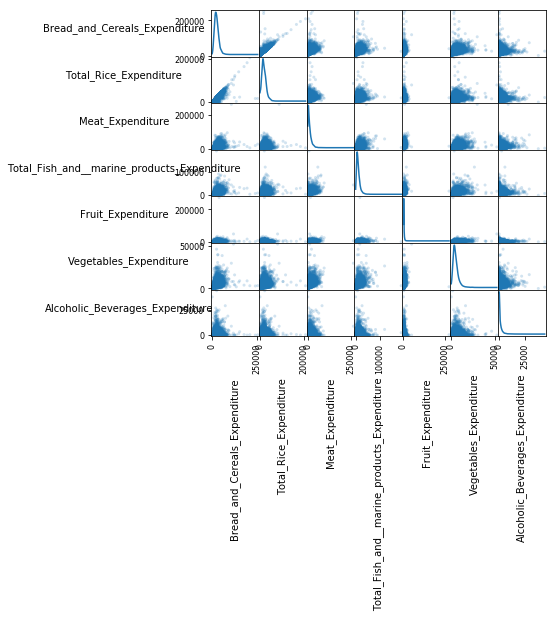

In [21]:
# Run scatter matrix on food expenditure variables to check for correlations
from pandas.plotting import scatter_matrix
scatter = pd.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
n = len(df.columns)
for x in range(n):
    for y in range(n):
        ax = scatter[x, y] 
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.labelpad = 50

Rice and breads/cereals appear positively correlated, which seems strange as the two could be viewed as substitutes. All distributions are clustered towards the origin and could probably benefit from a transformed distribution.

### Normalize the data
First, I will visualize the distributions as they are:

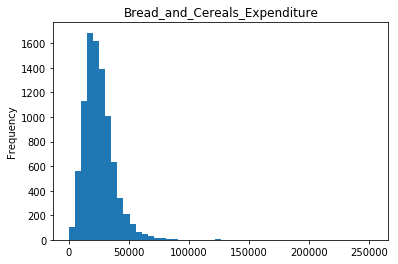

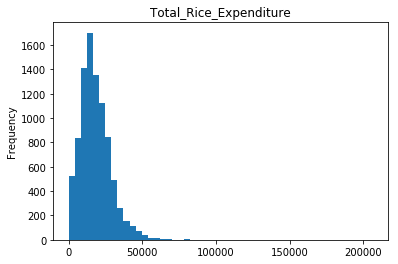

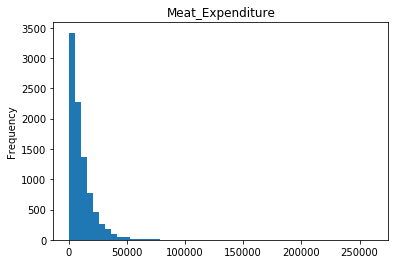

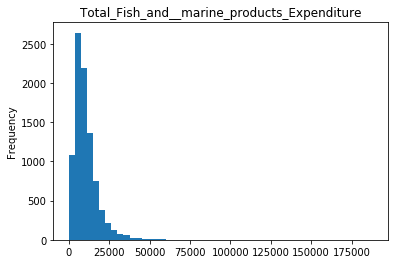

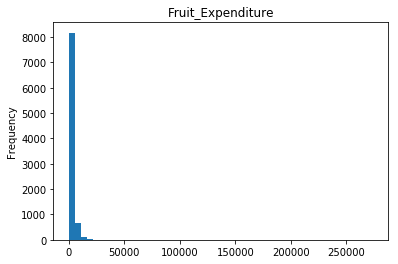

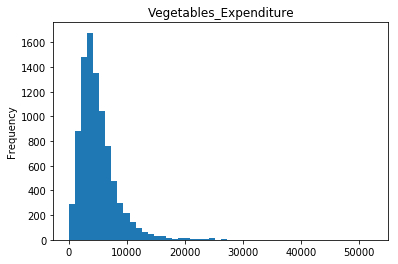

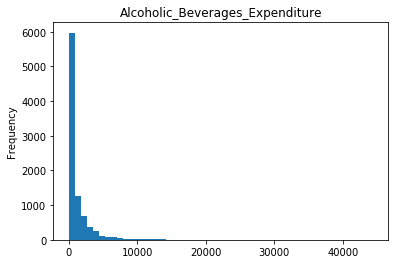

In [22]:
# Visualize distributions
collist1 = list(df.columns.values)
for i in collist1:
    df[i].plot(kind='hist', bins = 50)
    plt.title(i)
    plt.show()

As suspected, the distributions are all heavily skewed and could benefit from a transformation. Financial data and expenditures in particular usually improve when converted to a logarithmic scale. We transofrm the data below and visualize the new distributions for improvement:

/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


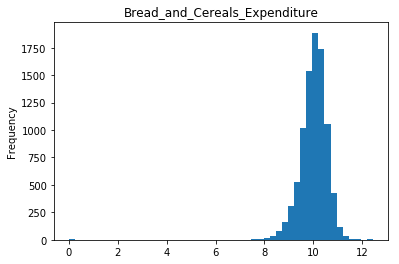

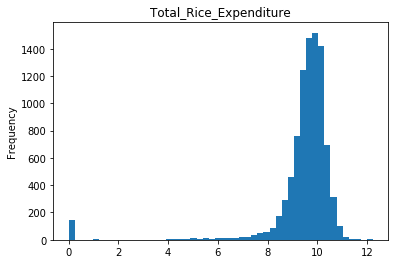

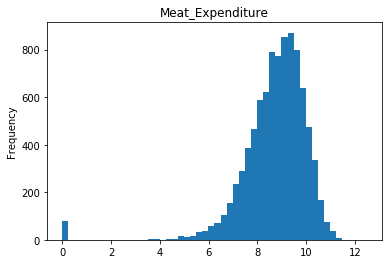

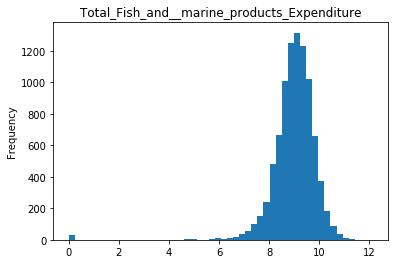

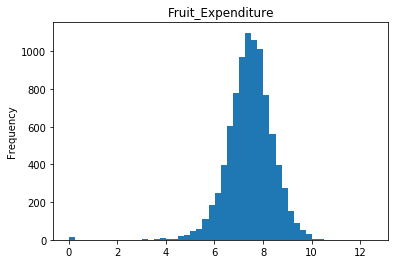

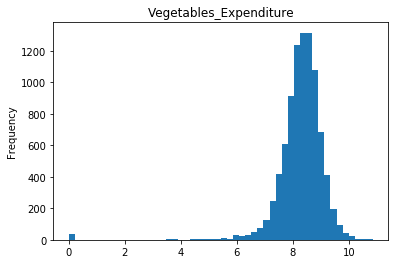

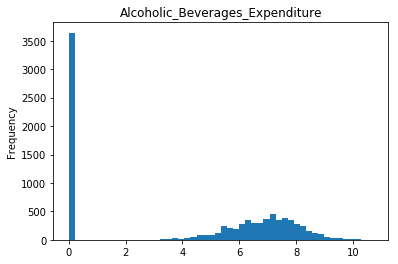

In [23]:
# Transform distributions
#convert integer features to logarithmic scale and view their resulting distributions
log_df = df

for i in collist1:
    log_df[i] = np.log(log_df[i] + 1)
    log_df[i].plot(kind='hist', bins = 50)
    plt.title(i)
    plt.show()

Feature distributions overall look much more normal now. Alcoholic beverages had mostly zeroes (one in my log transofrmation) in expendatures among households, so most likely should be dropped.

In [24]:
# Drop alcoholic beverage feature
log_df.drop(['Alcoholic_Beverages_Expenditure'], axis = 1, inplace = True)

/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


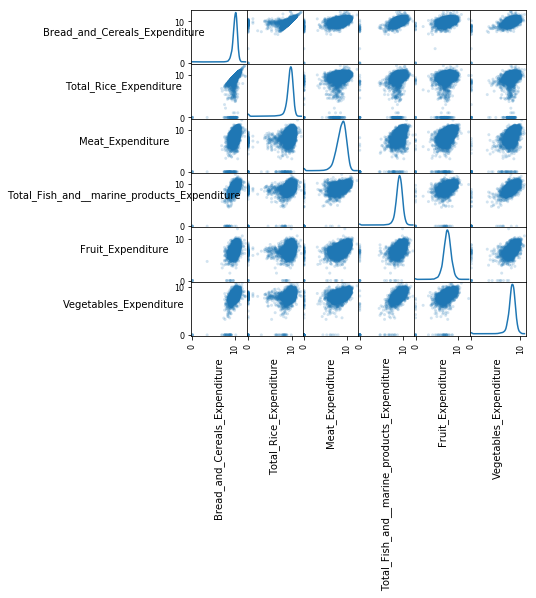

In [25]:
# Re-visualize correlations
log_scatter_df = log_df[['Bread_and_Cereals_Expenditure', 
           'Total_Rice_Expenditure', 'Meat_Expenditure', 
           'Total_Fish_and__marine_products_Expenditure', 'Fruit_Expenditure', 
           'Vegetables_Expenditure']]
log_scatter = pd.scatter_matrix(log_scatter_df, alpha=0.2, figsize=(6, 6), diagonal='kde')
n = len(log_scatter_df.columns)
for x in range(n):
    for y in range(n):
        ax = log_scatter[x, y] 
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.labelpad = 50

We continue to see a correlation between rice and bread/cereal expenditures. Other correlations appear weak. We also see a line of zero values (or rather one witht he log transformation) along the bottom and left sides of the graphs. Removing these zero-value households would leave us with a dataset unrepresentative of the *entire* dataset, with the tradeoff that the remaining households will be much easier to cluster and analyze.

In [26]:
# Drop zero values
for i in log_df.keys():
    print i
    print(log_df[i].loc[log_df[i] == 0.0])
    outliers = log_df.index[log_df[i] == 0]
    log_df.drop(outliers, axis = 0, inplace = True)

print "Dataset has {} households with {} features each.".format(*log_df.shape)

Bread_and_Cereals_Expenditure
16828    0.0
20080    0.0
12471    0.0
29931    0.0
8483     0.0
Name: Bread_and_Cereals_Expenditure, dtype: float64


/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Total_Rice_Expenditure
9503     0.0
36619    0.0
30539    0.0
40858    0.0
37984    0.0
36630    0.0
19369    0.0
11613    0.0
21846    0.0
24366    0.0
10458    0.0
35478    0.0
1208     0.0
36061    0.0
22258    0.0
22254    0.0
4729     0.0
10598    0.0
35488    0.0
21773    0.0
22086    0.0
37553    0.0
5109     0.0
24359    0.0
9670     0.0
36629    0.0
23799    0.0
11029    0.0
35940    0.0
22255    0.0
        ... 
23890    0.0
35818    0.0
21768    0.0
39349    0.0
9417     0.0
24064    0.0
9404     0.0
22373    0.0
9552     0.0
868      0.0
35495    0.0
21823    0.0
35590    0.0
5031     0.0
12164    0.0
35340    0.0
19607    0.0
11637    0.0
4721     0.0
36557    0.0
12738    0.0
40961    0.0
23290    0.0
36551    0.0
36106    0.0
4949     0.0
32893    0.0
35806    0.0
29159    0.0
32646    0.0
Name: Total_Rice_Expenditure, Length: 138, dtype: float64
Meat_Expenditure
33544    0.0
31830    0.0
20740    0.0
18864    0.0
27446    0.0
32746    0.0
8898     0.0
16854    0.0
30613

We can see that our dataset has dropped about 1,000 observations, which isn't too bad from a dataset of over 40,000 observations. Hopefully this will make patterns and clusters clearer, although the resulting dataset now ignored households that do not report expenditures on at least one category of food.

,Explained Variance,Bread_and_Cereals_Expenditure,Total_Rice_Expenditure,Meat_Expenditure,Total_Fish_and__marine_products_Expenditure,Fruit_Expenditure,Vegetables_Expenditure
Dimension 1,0.5414,-0.2310,-0.2832,-0.6494,-0.3596,-0.4551,-0.3291
Dimension 2,0.1620,-0.3664,-0.8035,0.3439,-0.1231,0.2945,-0.0027
Dimension 3,0.1412,0.0209,-0.0709,-0.6670,0.1622,0.6816,0.2424
Dimension 4,0.0835,-0.0110,-0.3275,-0.1226,0.7069,-0.4649,0.4022
Dimension 5,0.0497,0.0055,-0.0256,0.0035,0.5566,0.1580,-0.8152
Dimension 6,0.0223,0.9010,-0.4016,-0.0126,-0.1408,-0.0194,-0.0812


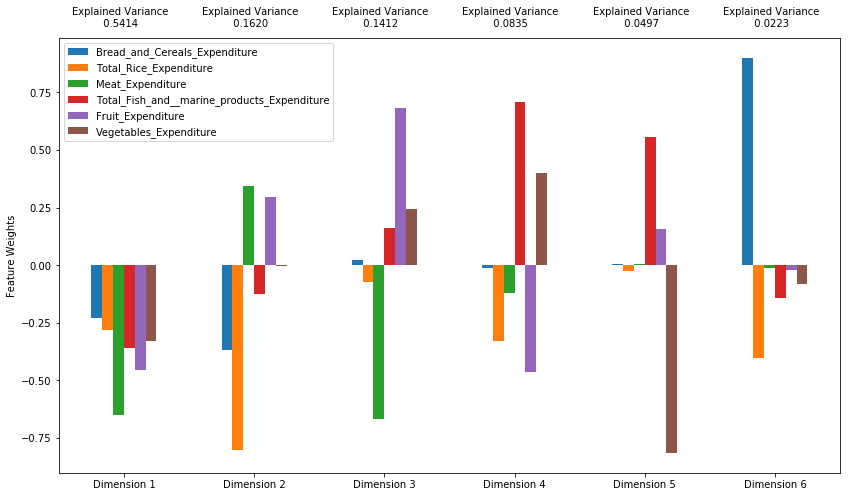

In [27]:
# Principal Component Analysis & visualization
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
projected = pca.fit_transform(log_df)

# Visualize PCA results
###code from Udacity Machine Learning nanodegree's customer 
###segmentation project at:
###https://github.com/udacity/machine-learning/tree/master/projects/customer_segments

# Index PCA dimensions
dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
# Index PCA components
components = pd.DataFrame(np.round(pca.components_, 4), columns = log_df.keys())
components.index = dimensions
#
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
variance_ratios.index = dimensions
# Create bar plot
fig, ax = plt.subplots(figsize = (14,8))
# Plot feature weights as function of components
components.plot(ax = ax, kind = 'bar');
ax.set_ylabel("Feature Weights")
ax.set_xticklabels(dimensions, rotation=0)
# Display explained variance ratios for PCA
for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))
# Return concatenated data frame
pd.concat([variance_ratios, components], axis = 1)



The first and dominant component, explaining more than 50% of variance, appears to be spending more (or less) on all goods concurrently, with meat showing the widest variance (for consumers spending more on all categories of food, they *especially* spend more on meat. The next most explanatory variable, accounting for only 16% of variation, indicates consumers who spend *much* less on rice and significantly less on bread, and relatively more on meat and fruit, than other consumers. **Research government food programs and write relevant analysis here** The third most explanatory variable decribed consumers who spent much less on meat and more on fruits and vegetables, indicating largely vegetarian (or pescetarian due to slightly higher marine product expendatures) diets. **Research vegetarianism in the Philippines to deduce if this is likely due to poverty or lifestyle choices.** We will stick to these three dimensions for our analysis.

In [28]:
# Reduce dataframe to first three PCA dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(log_df)

In [32]:
# Import model
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score 

#Pick samples for silhouette scoring
indices = [0,1,2,3,4,5,6,7,8,9,10]
samples = pd.DataFrame(reduced_data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [ ]:
for i in range (2,6):
    clusterer = GaussianMixture(n_components=i, covariance_type='full').fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data,preds)
    print ("Silhouette score for {} clusters: {} ".format(i, score))

In [ ]:
# Cluster visualization

In [ ]:
# Analyze centers

In [ ]:
# Conclusion